In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
ches_results = pd.read_excel('../data/ches_scores/LLM scores vs CHES.xlsx')[['Document','Status','Dimension','Expert mean']]

In [18]:
ches_results = ches_results[~ches_results['Status'].isna()]

In [19]:
ches_results

,Document,Status,Dimension,Expert mean
1,CZ 2006 Green,Calibration,EU,6.25
2,CZ 2006 Green,Calibration,TaxSpend,5.67
3,CZ 2006 Green,Calibration,SocialLifestyle,3
4,CZ 2006 Green,Calibration,Immigration,4.75
5,CZ 2006 Green,Calibration,Environment,x
...,...,...,...,...
69,SWE 2010 Moderate,Test,TaxSpend,7.57
70,SWE 2010 Moderate,Test,SocialLifestyle,3.21
71,SWE 2010 Moderate,Test,Immigration,5.36
72,SWE 2010 Moderate,Test,Environment,5.93


In [20]:
llm_cali_results = pd.read_excel('../data/results/calibration_results.xlsx')

In [74]:
llm_test_results = pd.read_excel('../data/results/test_set_results.xlsx')

In [75]:
llm_results = pd.concat([llm_cali_results,llm_test_results])

In [76]:
llm_results

,file,issue,model,score,error_message,prompt,created_at,ches_issue,ches_file
0,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are an exper...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem
1,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are an exper...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem
2,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are an exper...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem
3,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem
4,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem
...,...,...,...,...,...,...,...,...,...
1291,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-30 07:58:27.080,NaN,NaN
1292,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-30 07:58:27.080,NaN,NaN
1293,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are a profes...,2024-06-30 07:58:27.080,NaN,NaN
1294,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are a profes...,2024-06-30 07:58:27.080,NaN,NaN


In [77]:
issue_map = {'european_union': 'EU',
             'taxation': 'TaxSpend',
             'lifestyle': 'SocialLifestyle',
             'immigration': 'Immigration',
             'environment': 'Environment',
             'decentralization': 'Regions'}

In [78]:
llm_results['ches_issue'] = llm_results['issue'].map(issue_map)

In [79]:
llm_results

,file,issue,model,score,error_message,prompt,created_at,ches_issue,ches_file
0,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are an exper...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem
1,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are an exper...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem
2,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are an exper...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem
3,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem
4,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem
...,...,...,...,...,...,...,...,...,...
1291,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-30 07:58:27.080,Regions,NaN
1292,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-30 07:58:27.080,Regions,NaN
1293,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are a profes...,2024-06-30 07:58:27.080,Regions,NaN
1294,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are a profes...,2024-06-30 07:58:27.080,Regions,NaN


In [80]:
llm_results['ches_file'] = llm_results.file.apply(lambda x: x.split('/')[-1].split('-')[-1].split('.')[0].strip())

In [81]:
llm_results['ches_file']

0        HUN 2010 Soc Dem
1        HUN 2010 Soc Dem
2        HUN 2010 Soc Dem
3        HUN 2010 Soc Dem
4        HUN 2010 Soc Dem
              ...        
1291    SWE 2010 Moderate
1292    SWE 2010 Moderate
1293    SWE 2010 Moderate
1294    SWE 2010 Moderate
1295    SWE 2010 Moderate
Name: ches_file, Length: 2592, dtype: object

In [82]:
merged_results = llm_results.merge(ches_results[['Document', 'Dimension', 'Expert mean']], left_on=['ches_file','ches_issue'], right_on=['Document', 'Dimension'], how='left', copy=False)

In [83]:
merged_results

,file,issue,model,score,error_message,prompt,created_at,ches_issue,ches_file,Document,Dimension,Expert mean
0,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are an exper...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem,HUN 2010 Soc Dem,EU,6.65
1,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are an exper...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem,HUN 2010 Soc Dem,EU,6.65
2,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are an exper...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem,HUN 2010 Soc Dem,EU,6.65
3,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem,HUN 2010 Soc Dem,EU,6.65
4,../data/plaintext/0 Calibration - HUN 2010 Soc...,european_union,gpt-4o,6.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-29 09:13:25.835,EU,HUN 2010 Soc Dem,HUN 2010 Soc Dem,EU,6.65
...,...,...,...,...,...,...,...,...,...,...,...,...
2587,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-30 07:58:27.080,Regions,SWE 2010 Moderate,SWE 2010 Moderate,Regions,5.17
2588,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are highly i...,2024-06-30 07:58:27.080,Regions,SWE 2010 Moderate,SWE 2010 Moderate,Regions,5.17
2589,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are a profes...,2024-06-30 07:58:27.080,Regions,SWE 2010 Moderate,SWE 2010 Moderate,Regions,5.17
2590,../data/plaintext/1 Test - SWE 2010 Moderate.txt,decentralization,claude-3-5-sonnet-20240620,3.0,NaN,[SystemMessage(content='\n You are a profes...,2024-06-30 07:58:27.080,Regions,SWE 2010 Moderate,SWE 2010 Moderate,Regions,5.17


In [84]:
merged_results[merged_results['Expert mean'].isna()].ches_file.value_counts()

ches_file
CSU                162
AU 99 FPO          162
POR1999 Soc Dem    162
FR 2002 FN txt     162
Name: count, dtype: int64

In [85]:
cleaned_results = merged_results[~merged_results['Expert mean'].isna()]

In [86]:
cleaned_results = cleaned_results.drop(columns=['Document', 'Dimension', 'file','issue','error_message','created_at'])

In [87]:
cleaned_results

,model,score,prompt,ches_issue,ches_file,Expert mean
0,gpt-4o,6.0,[SystemMessage(content='\n You are an exper...,EU,HUN 2010 Soc Dem,6.65
1,gpt-4o,6.0,[SystemMessage(content='\n You are an exper...,EU,HUN 2010 Soc Dem,6.65
2,gpt-4o,6.0,[SystemMessage(content='\n You are an exper...,EU,HUN 2010 Soc Dem,6.65
3,gpt-4o,6.0,[SystemMessage(content='\n You are highly i...,EU,HUN 2010 Soc Dem,6.65
4,gpt-4o,6.0,[SystemMessage(content='\n You are highly i...,EU,HUN 2010 Soc Dem,6.65
...,...,...,...,...,...,...
2587,claude-3-5-sonnet-20240620,3.0,[SystemMessage(content='\n You are highly i...,Regions,SWE 2010 Moderate,5.17
2588,claude-3-5-sonnet-20240620,3.0,[SystemMessage(content='\n You are highly i...,Regions,SWE 2010 Moderate,5.17
2589,claude-3-5-sonnet-20240620,3.0,[SystemMessage(content='\n You are a profes...,Regions,SWE 2010 Moderate,5.17
2590,claude-3-5-sonnet-20240620,3.0,[SystemMessage(content='\n You are a profes...,Regions,SWE 2010 Moderate,5.17


In [88]:
cleaned_results['difference'] = cleaned_results['score'] - pd.to_numeric(cleaned_results['Expert mean'], errors='coerce')

<Axes: >

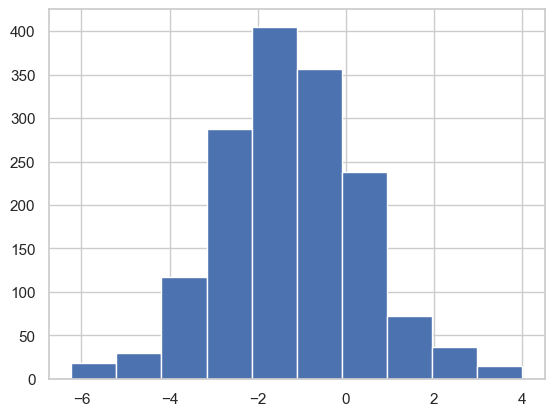

In [89]:
cleaned_results['difference'].hist()

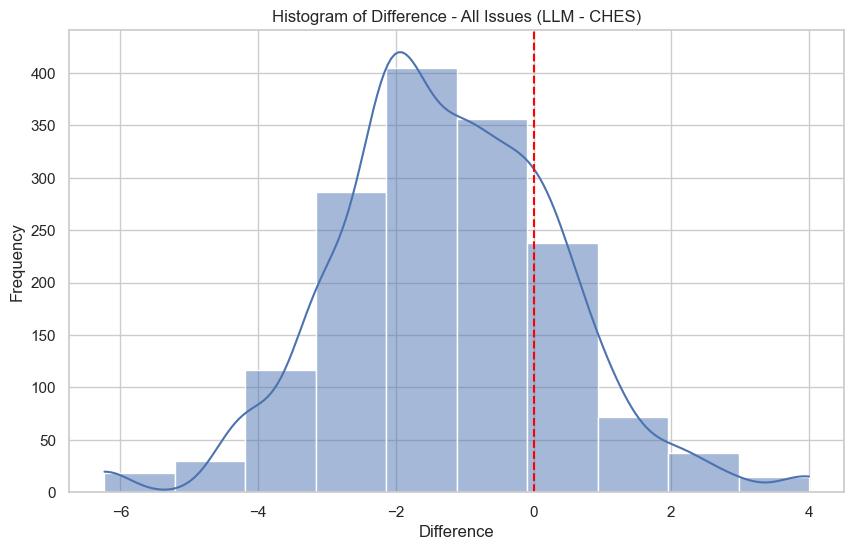

In [101]:
sns.set(style="whitegrid")

# 1. Histogram of 'difference'
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_results['difference'], bins=10, kde=True)
plt.title('Histogram of Difference - All Issues (LLM - CHES)')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.axvline(x=0, linestyle='--', color='red')
plt.show()

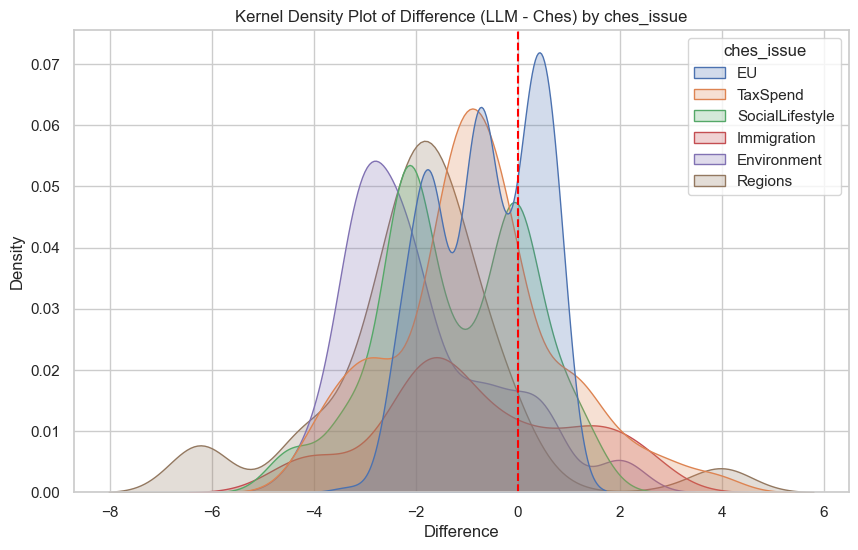

In [99]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cleaned_results, x='difference', hue='ches_issue', fill=True)
plt.title('Kernel Density Plot of Difference (LLM - Ches) by ches_issue')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.axvline(x=0, linestyle='--', color='red')
plt.show()

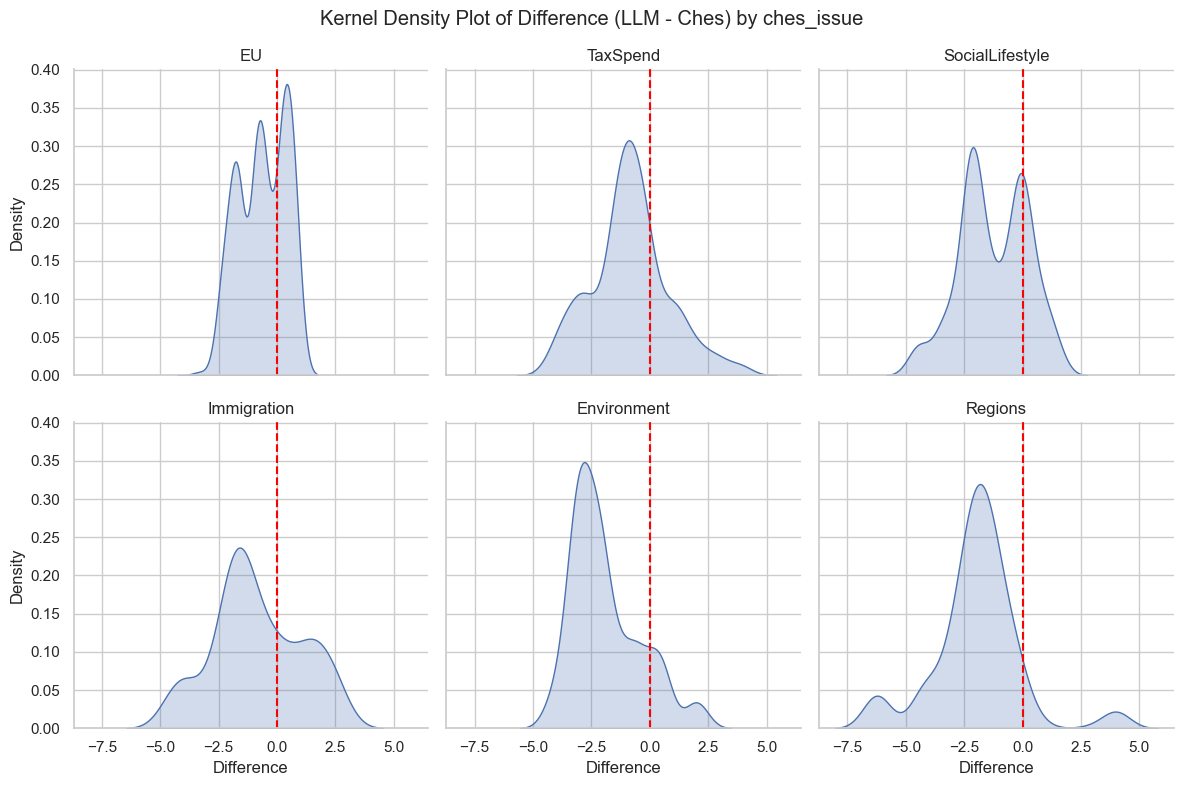

In [97]:
# Create the FacetGrid
g = sns.FacetGrid(cleaned_results, col="ches_issue", col_wrap=3, height=4, sharex=True, sharey=True)

# Map the kdeplot to each facet
g.map(sns.kdeplot, "difference", fill=True)

# Add titles and adjust the layout
g.set_titles("{col_name}")
g.set_axis_labels("Difference", "Density")
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Kernel Density Plot of Difference (LLM - Ches) by ches_issue')
g.map(plt.axvline, x=0, linestyle='--', color='red')

# Show the plot
plt.show()

In [104]:
cleaned_results.model = cleaned_results.model.map({'gemini-1.5-pro-001': 'Gemini 1.5 Pro',
                           'claude-3-5-sonnet-20240620': 'Claude 3.5 Sonnet',
                           'gpt-4o': 'GPT-4o',})

In [106]:
cleaned_results.model.value_counts()

model
GPT-4o               648
Gemini 1.5 Pro       648
Claude 3.5 Sonnet    648
Name: count, dtype: int64

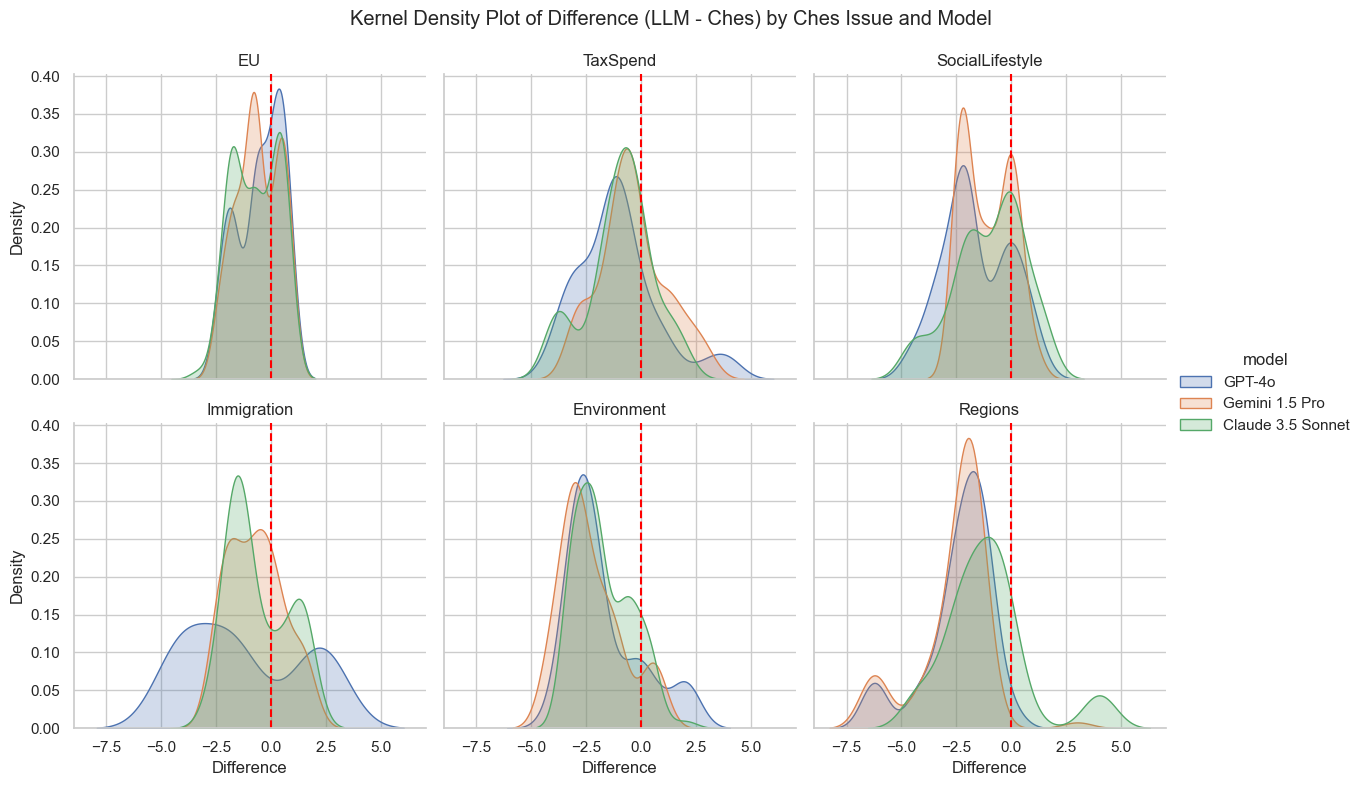

In [111]:
g = sns.FacetGrid(cleaned_results, col="ches_issue", hue="model", col_wrap=3, height=4, sharex=True, sharey=True)

# Map the kdeplot to each facet
g.map(sns.kdeplot, "difference", fill=True)

# Add a vertical line at 0 to each facet
for ax in g.axes.flat:
    ax.axvline(x=0, linestyle='--', color='red')

# Add titles and adjust the layout
g.set_titles("{col_name}")
g.set_axis_labels("Difference", "Density")
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Kernel Density Plot of Difference (LLM - Ches) by Ches Issue and Model')

# Add legend
g.add_legend()

# Show the plot
plt.show()

In [113]:
cleaned_results.to_excel('../data/results/ches_comparison_results.xlsx', index=False)